In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wine = pd.read_csv('winequalityN.csv')

In [4]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

- ### Limpieza Variables Númericas

#### Primero se eliminan los valores nulos del dataframe, reemplazandolos por la media

In [5]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
cols_numeric = []
cols_category = []

for cols_ in wine.columns:
    if (wine[cols_].dtypes in['int64']) | (wine[cols_].dtypes in['float64']):
        cols_numeric.append(cols_)
    elif wine[cols_].dtypes in['object']:
        cols_category.append(cols_)
    else: 
        continue

for cols in cols_numeric:
    wine.loc[pd.isnull(wine[cols]), cols] = np.mean(wine[cols])
    wine.loc[wine[cols] == 0, cols] = np.mean(wine[cols])

In [7]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.326080,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.136720,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.010000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.318722,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Observando el cuadro de descripcion de las columna, encontramos que las variables que presentan potenciales valores atipicos, para confirmar las sospechas se realizaran los boxplot de las variables a continuacion:

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04aaeb370>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04aaeb9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04aaeb0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04aaebeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04aafe1c0>],
 'means': []}

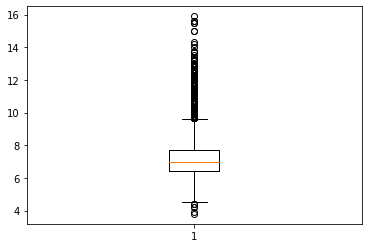

In [9]:
plt.boxplot( wine["fixed acidity"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04abd4430>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04abd49d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04abd4160>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04abd4f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04abe2280>],
 'means': []}

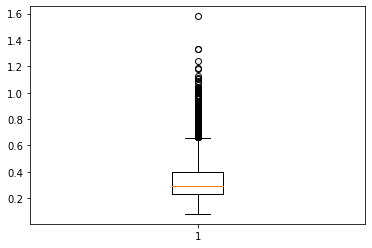

In [10]:
plt.boxplot( wine["volatile acidity"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04ac44790>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04ac44d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04ac444c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04ac52310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04ac525e0>],
 'means': []}

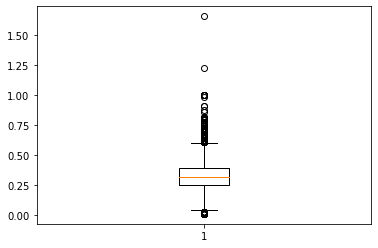

In [11]:
plt.boxplot( wine["citric acid"] ) 

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04acb7940>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04acb7dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04acb7670>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04acc63a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04acc6670>],
 'means': []}

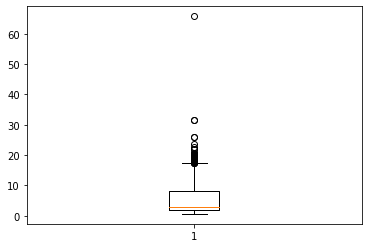

In [12]:
plt.boxplot( wine["residual sugar"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04ad22460>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04ad22a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04ad22190>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04ad22fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04ad2f2b0>],
 'means': []}

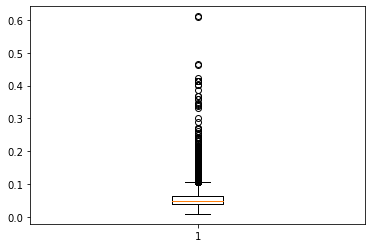

In [13]:
plt.boxplot( wine["chlorides"] ) 

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04ad7edc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04ad8f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04ad7eaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04ad8f940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04ad8fc10>],
 'means': []}

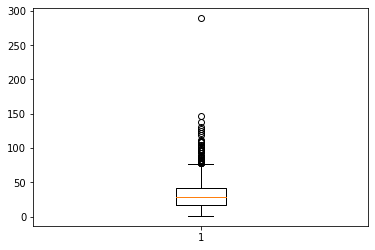

In [14]:
plt.boxplot( wine["free sulfur dioxide"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04adf06d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04adf0ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04adf0400>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04adfc280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04adfc550>],
 'means': []}

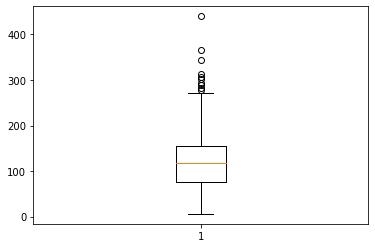

In [15]:
plt.boxplot( wine["total sulfur dioxide"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04ae4e970>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04ae4ef10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04ae4e6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04ae5c4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04ae5c7c0>],
 'means': []}

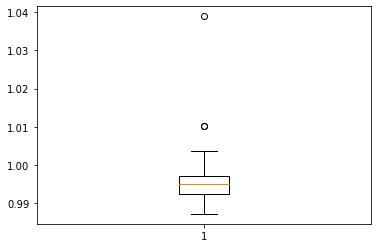

In [16]:
plt.boxplot( wine["density"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04aeafcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04aebe2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04aeafa00>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04aebe850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04aebeb20>],
 'means': []}

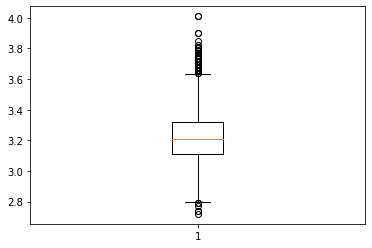

In [17]:
plt.boxplot( wine["pH"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04af213a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04af21940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04af210d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04af21ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04af2d1f0>],
 'means': []}

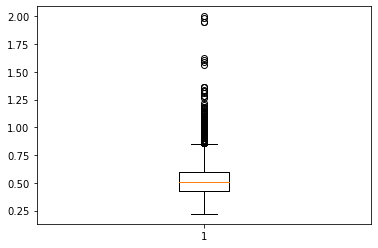

In [18]:
plt.boxplot( wine["sulphates"] ) 

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04af88520>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04af88ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04af88250>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04af970a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04af97370>],
 'means': []}

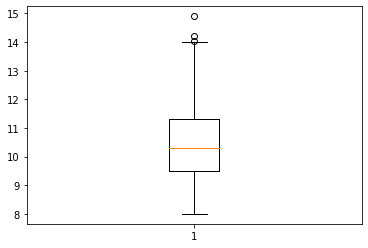

In [19]:
plt.boxplot( wine["alcohol"] )

#### Analizando cada una de las columnas, las escogidas para limpiar que representan una gran cantidad de valores atipicos son:
- #### fixed acidity 
- #### volatile acidity 
- #### citric acid 
- #### residual sugar
- #### chlorides
- #### free sulfur dioxide
- #### total sulfur dioxide
- #### pH
- #### sulphates

#### Ahora veremos la estratificación usando la columna "type"

In [20]:
wine.loc[ : , ["type"] ].value_counts()/ wine.shape[0]

type 
white    0.753886
red      0.246114
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04bfb2b20>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04bfb2fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04bfb2850>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04bfc0580>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04bfc0850>],
 'means': []}

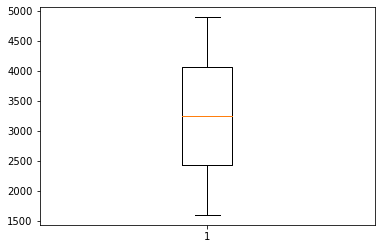

In [21]:
plt.boxplot( wine.loc[ : , ["type"] ].value_counts() )

#### Al hacer un analisis de la columna type encontramos que no tiene valores atipicos y cuenta con una distribucion de datos normal

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

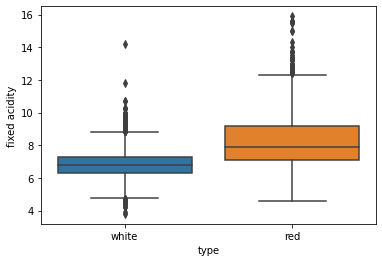

In [22]:
sns.boxplot( data=wine  , x="type" , y="fixed acidity" )

<AxesSubplot:xlabel='type', ylabel='volatile acidity'>

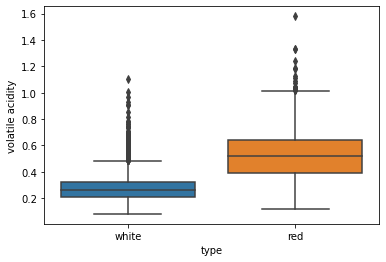

In [23]:
sns.boxplot( data=wine  , x="type" , y="volatile acidity" )

<AxesSubplot:xlabel='type', ylabel='citric acid'>

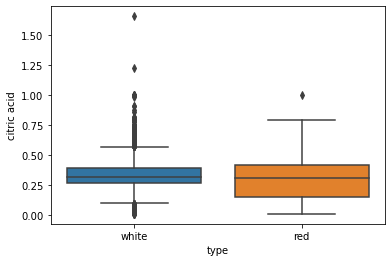

In [24]:
sns.boxplot( data=wine  , x="type" , y="citric acid" )

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

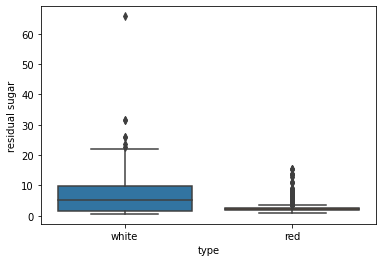

In [25]:
sns.boxplot( data=wine  , x="type" , y="residual sugar" )

<AxesSubplot:xlabel='type', ylabel='chlorides'>

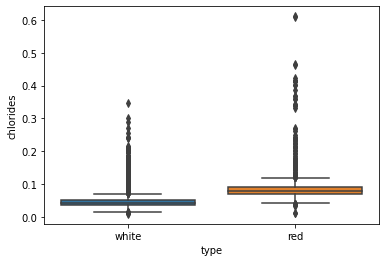

In [26]:
sns.boxplot( data=wine  , x="type" , y="chlorides" )

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

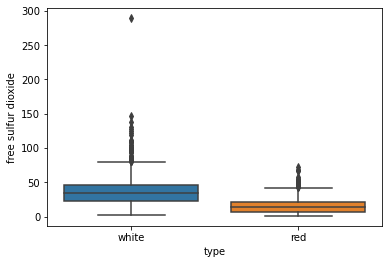

In [27]:
sns.boxplot( data=wine  , x="type" , y="free sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

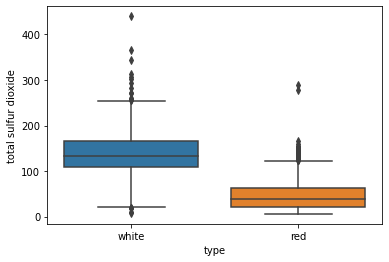

In [28]:
sns.boxplot( data=wine  , x="type" , y="total sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='pH'>

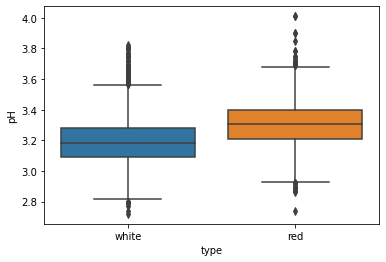

In [29]:
sns.boxplot( data=wine  , x="type" , y="pH" )

<AxesSubplot:xlabel='type', ylabel='sulphates'>

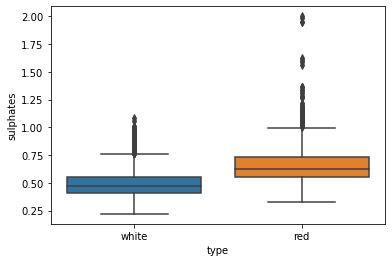

In [30]:
sns.boxplot( data=wine  , x="type" , y="sulphates" )

#### Al realizar la estratificacion nos damos cuenta que en ambos casos se presentan una serie de valores atipicos por lo cual, hacemos la estratificacion con la columna "type" en el caso de la columna "citrid acid" ya que presenta valores atipicos nada mas para el type "white" se hara solo para ese valor y en la columna "residual sugar" sera para el type "red"

### Limpieza variable "free sulfur dioxide"

In [31]:
types = wine.loc[ : , ['free sulfur dioxide'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a04c477250>,
 'caps': [<matplotlib.lines.Line2D at 0x2a04c477820>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a04c469f40>],
 'medians': [<matplotlib.lines.Line2D at 0x2a04c477dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a04c4860d0>],
 'means': []}

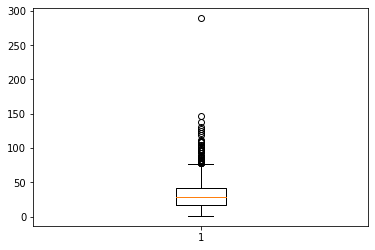

In [32]:
plt.boxplot(types)

#### Se usara la manera automatizada para la limpieza de las variables

In [33]:
wineq1 = wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","free_sulfur_dioxide_q1"]

In [34]:
wineq2 = wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","free_sulfur_dioxide_q2"]

In [35]:
wineq3 = wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","free_sulfur_dioxide_q3"]

In [36]:
wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

In [37]:
wine_iqr.head(2)

,type,free_sulfur_dioxide_q1,free_sulfur_dioxide_q2,free_sulfur_dioxide_q3
0,red,7.0,14.0,21.0
1,white,23.0,34.0,46.0


In [38]:
wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["free_sulfur_dioxide_q3"] - r["free_sulfur_dioxide_q1"] , axis = 1)

In [39]:
wine_iqr.head(2)

,type,free_sulfur_dioxide_q1,free_sulfur_dioxide_q2,free_sulfur_dioxide_q3,iqr
0,red,7.0,14.0,21.0,14.0
1,white,23.0,34.0,46.0,23.0


In [40]:
wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["free_sulfur_dioxide_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["free_sulfur_dioxide_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [41]:
wine_iqr.head(2)

,type,free_sulfur_dioxide_q1,free_sulfur_dioxide_q2,free_sulfur_dioxide_q3,iqr,upper,lower
0,red,7.0,14.0,21.0,14.0,42.0,-14.0
1,white,23.0,34.0,46.0,23.0,80.5,-11.5


In [42]:
wine.shape

(6497, 13)

In [43]:
wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

In [44]:
wine.shape

(6497, 19)

In [45]:
def getRealFree_Sulfur_dioxide(r):
    if ( r["free sulfur dioxide"] <= r["lower"] ) | ( r["free sulfur dioxide"] >= r["upper"] ):
        return r["free_sulfur_dioxide_q2"]
    else:
        return r["free sulfur dioxide"]

In [46]:
wine["new free sulfur dioxide"] = wine.apply( lambda r: getRealFree_Sulfur_dioxide(r) , axis = 1 )

In [47]:
wine.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,free_sulfur_dioxide_q1,free_sulfur_dioxide_q2,free_sulfur_dioxide_q3,iqr,upper,lower,new free sulfur dioxide
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,23.0,34.0,46.0,23.0,80.5,-11.5,45.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,23.0,34.0,46.0,23.0,80.5,-11.5,14.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,23.0,34.0,46.0,23.0,80.5,-11.5,30.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,23.0,34.0,46.0,23.0,80.5,-11.5,47.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,23.0,34.0,46.0,23.0,80.5,-11.5,47.0


In [48]:
wine = wine.drop(columns = ['free_sulfur_dioxide_q1', 'free_sulfur_dioxide_q2', 'free_sulfur_dioxide_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

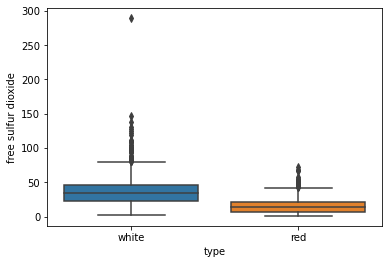

In [49]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="free sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='new free sulfur dioxide'>

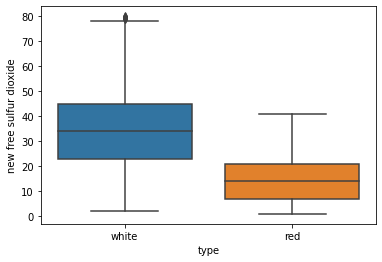

In [50]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new free sulfur dioxide" )

#### De aqui en adelante las demas columnas representan casi el mismo proceso, por lo cual, se realizaran las acciones en una sola celda
### Limpieza variable "fixed acidity"

In [51]:
types = wine.loc[ : , ['fixed acidity'] ]

wineq1 = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","fixed_acidity_q1"]

wineq2 = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","fixed_acidity_q2"]

wineq3 = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","fixed_acidity_q3"]

wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["fixed_acidity_q3"] - r["fixed_acidity_q1"] , axis = 1)

wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["fixed_acidity_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["fixed_acidity_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

def getRealFixed_acidity(r):
    if ( r["fixed acidity"] <= r["lower"] ) | ( r["fixed acidity"] >= r["upper"] ):
        return r["fixed_acidity_q2"]
    else:
        return r["fixed acidity"]
    
wine["new fixed acidity"] = wine.apply( lambda r: getRealFixed_acidity(r) , axis = 1 )

wine = wine.drop(columns = ['fixed_acidity_q1', 'fixed_acidity_q2', 'fixed_acidity_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

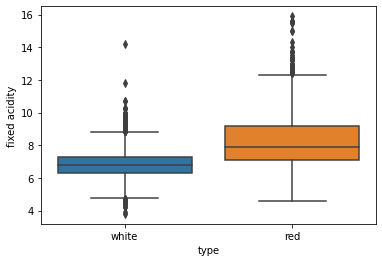

In [52]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="fixed acidity" )

<AxesSubplot:xlabel='type', ylabel='new fixed acidity'>

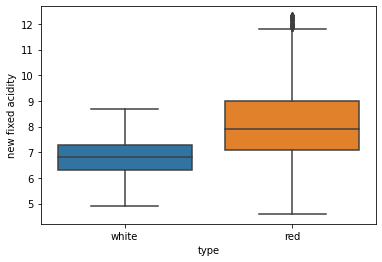

In [53]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new fixed acidity" )

### Limpieza variable "volatile acidity" 

In [54]:
types = wine.loc[ : , ['volatile acidity'] ]

wineq1 = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","volatile_acidity_q1"]

wineq2 = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","volatile_acidity_q2"]

wineq3 = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","volatile_acidity_q3"]

wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["volatile_acidity_q3"] - r["volatile_acidity_q1"] , axis = 1)

wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["volatile_acidity_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["volatile_acidity_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

def getRealVolatile_acidity(r):
    if ( r["volatile acidity"] <= r["lower"] ) | ( r["volatile acidity"] >= r["upper"] ):
        return r["volatile_acidity_q2"]
    else:
        return r["volatile acidity"]
    
wine["new volatile acidity"] = wine.apply( lambda r: getRealVolatile_acidity(r) , axis = 1 )

wine = wine.drop(columns = ['volatile_acidity_q1', 'volatile_acidity_q2', 'volatile_acidity_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='volatile acidity'>

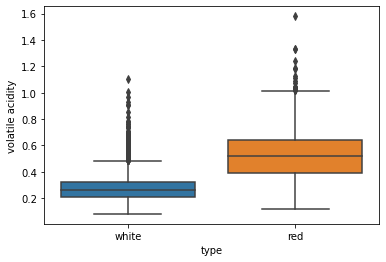

In [55]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="volatile acidity" )

<AxesSubplot:xlabel='type', ylabel='new volatile acidity'>

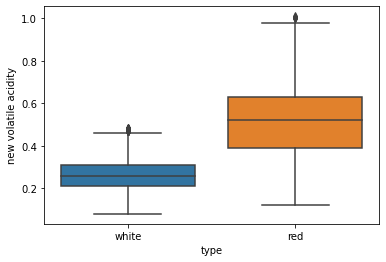

In [56]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new volatile acidity" )

### Limpieza variable "citric acid" 
#### Para esta parte se utilziara solo el type de "White" ya que para "red" no hay valores atipicos

<AxesSubplot:xlabel='type', ylabel='citric acid'>

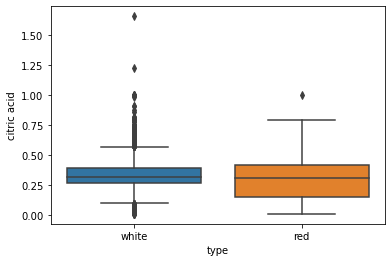

In [57]:
sns.boxplot( data=wine  , x="type" , y="citric acid" )

In [58]:
types = wine.loc[ wine['type'] == 'white' , ['citric acid'] ]

wineq1 = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","citric_acid_q1"]

wineq2 = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","citric_acid_q2"]

wineq3 = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","citric_acid_q3"]

wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["citric_acid_q3"] - r["citric_acid_q1"] , axis = 1)

wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["citric_acid_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["citric_acid_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

def getRealCitric_acid(r):
    if ( r["citric acid"] <= r["lower"] ) | ( r["citric acid"] >= r["upper"] ):
        return r["citric_acid_q2"]
    else:
        return r["citric acid"]
    
wine["new citric acid"] = wine.apply( lambda r: getRealCitric_acid(r) , axis = 1 )

wine = wine.drop(columns = ['citric_acid_q1', 'citric_acid_q2', 'citric_acid_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='citric acid'>

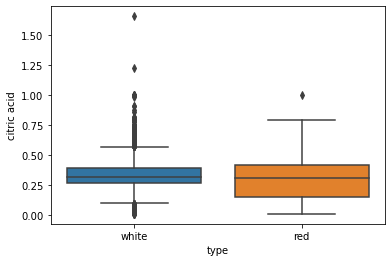

In [59]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="citric acid" )

<AxesSubplot:xlabel='type', ylabel='new citric acid'>

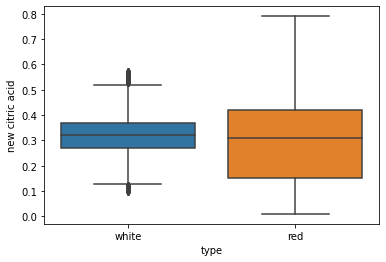

In [60]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new citric acid" )

### Limpieza variable "residual sugar"
#### Para esta parte se utilziara solo el type de "red" ya que para "white" no presenta muchos valores atipicos

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

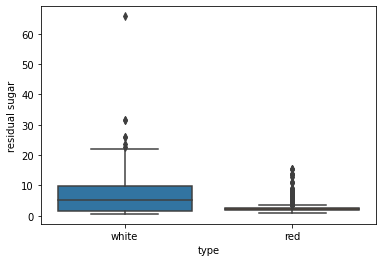

In [61]:
sns.boxplot( data=wine  , x="type" , y="residual sugar" )

In [62]:
types = wine.loc[ wine['type'] == 'red' , ['residual sugar'] ]

wineq1 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","residual_sugar_q1"]

wineq2 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","residual_sugar_q2"]

wineq3 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","residual_sugar_q3"]

wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["residual_sugar_q3"] - r["residual_sugar_q1"] , axis = 1)

wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["residual_sugar_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["residual_sugar_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

def getRealResidual_sugar(r):
    if ( r["residual sugar"] <= r["lower"] ) | ( r["residual sugar"] >= r["upper"] ):
        return r["residual_sugar_q2"]
    else:
        return r["residual sugar"]
    
wine["new residual sugar"] = wine.apply( lambda r: getRealResidual_sugar(r) , axis = 1 )

wine = wine.drop(columns = ['residual_sugar_q1', 'residual_sugar_q2', 'residual_sugar_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

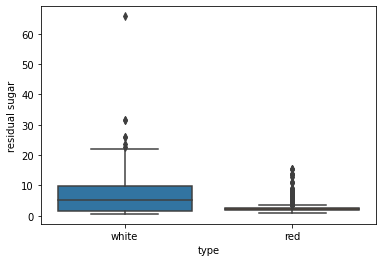

In [63]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="residual sugar" )

<AxesSubplot:xlabel='type', ylabel='new residual sugar'>

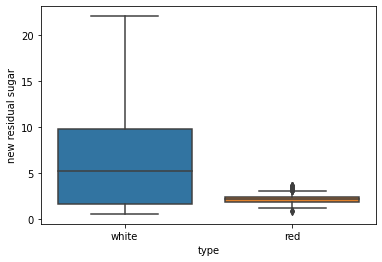

In [64]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new residual sugar" )

### Limpieza variable "chlorides"

In [65]:
types = wine.loc[ : , ['chlorides'] ]

wineq1 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","chlorides_q1"]

wineq2 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","chlorides_q2"]

wineq3 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","chlorides_q3"]

wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["chlorides_q3"] - r["chlorides_q1"] , axis = 1)

wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["chlorides_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["chlorides_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

def getRealChlorides(r):
    if ( r["chlorides"] <= r["lower"] ) | ( r["chlorides"] >= r["upper"] ):
        return r["chlorides_q2"]
    else:
        return r["chlorides"]
    
wine["new chlorides"] = wine.apply( lambda r: getRealChlorides(r) , axis = 1 )

wine = wine.drop(columns = ['chlorides_q1', 'chlorides_q2', 'chlorides_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='chlorides'>

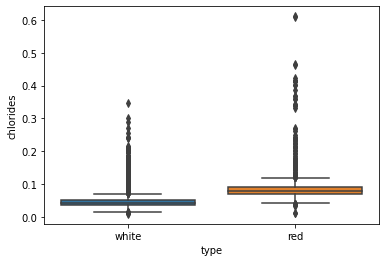

In [66]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="chlorides" )

<AxesSubplot:xlabel='type', ylabel='new chlorides'>

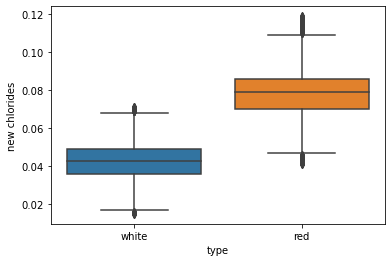

In [67]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new chlorides" )

### Limpieza variable "total sulfur dioxide"

In [68]:
types = wine.loc[ : , ['total sulfur dioxide'] ]

wineq1 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","total_sulfur_dioxide_q1"]

wineq2 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","total_sulfur_dioxide_q2"]

wineq3 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","total_sulfur_dioxide_q3"]

wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["total_sulfur_dioxide_q3"] - r["total_sulfur_dioxide_q1"] , axis = 1)

wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["total_sulfur_dioxide_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["total_sulfur_dioxide_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

def getRealTotal_sulfur_dioxide(r):
    if ( r["total sulfur dioxide"] <= r["lower"] ) | ( r["total sulfur dioxide"] >= r["upper"] ):
        return r["total_sulfur_dioxide_q2"]
    else:
        return r["total sulfur dioxide"]
    
wine["new total sulfur dioxide"] = wine.apply( lambda r: getRealTotal_sulfur_dioxide(r) , axis = 1 )

wine = wine.drop(columns = ['total_sulfur_dioxide_q1', 'total_sulfur_dioxide_q2', 'total_sulfur_dioxide_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

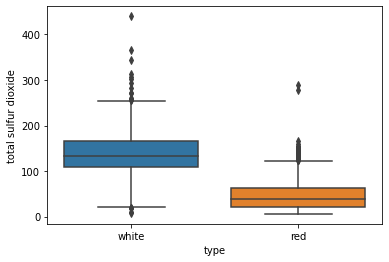

In [69]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="total sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='new total sulfur dioxide'>

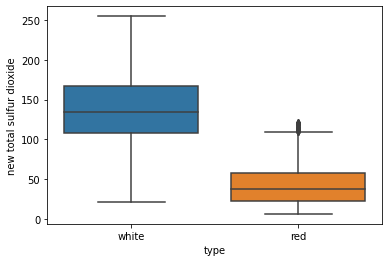

In [70]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new total sulfur dioxide" )

### Limpieza variable "pH"

In [71]:
types = wine.loc[ : , ['pH'] ]

wineq1 = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","pH_q1"]

wineq2 = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","pH_q2"]

wineq3 = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","pH_q3"]

wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["pH_q3"] - r["pH_q1"] , axis = 1)

wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["pH_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["pH_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

def getRealpH(r):
    if ( r["pH"] <= r["lower"] ) | ( r["pH"] >= r["upper"] ):
        return r["pH_q2"]
    else:
        return r["pH"]
    
wine["new pH"] = wine.apply( lambda r: getRealpH(r) , axis = 1 )

wine = wine.drop(columns = ['pH_q1', 'pH_q2', 'pH_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='pH'>

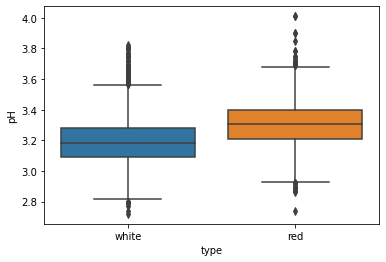

In [72]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="pH" )

<AxesSubplot:xlabel='type', ylabel='new pH'>

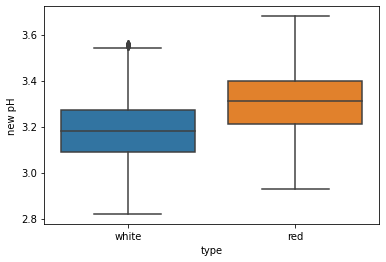

In [73]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new pH" )

### Limpieza variable "sulphates"

In [74]:
types = wine.loc[ : , ['sulphates'] ]

wineq1 = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wineq1.columns = ["type","sulphates_q1"]

wineq2 = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
wineq2.columns = ["type","sulphates_q2"]

wineq3 = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wineq3.columns = ["type","sulphates_q3"]

wine_iqr = wineq1.merge( wineq2 , on=["type"] , how="inner" ).merge( wineq3 , on=["type"] , how="inner" )

wine_iqr["iqr"] = wine_iqr.apply( lambda r: r["sulphates_q3"] - r["sulphates_q1"] , axis = 1)

wine_iqr["upper"] = wine_iqr.apply( lambda r: ( r["sulphates_q3"] + 1.5*r["iqr"] ) , axis = 1)
wine_iqr["lower"] = wine_iqr.apply( lambda r: ( r["sulphates_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( wine_iqr , on=["type"] , how="left" ).copy()

def getRealSulphates(r):
    if ( r["sulphates"] <= r["lower"] ) | ( r["sulphates"] >= r["upper"] ):
        return r["sulphates_q2"]
    else:
        return r["sulphates"]
    
wine["new sulphates"] = wine.apply( lambda r: getRealSulphates(r) , axis = 1 )

wine = wine.drop(columns = ['sulphates_q1', 'sulphates_q2', 'sulphates_q3', 'iqr', 'upper', 'lower'])

<AxesSubplot:xlabel='type', ylabel='sulphates'>

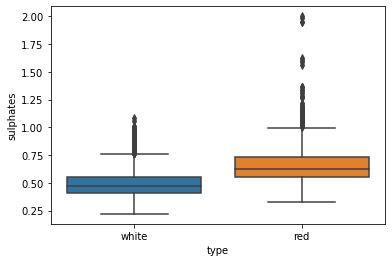

In [75]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="sulphates" )

<AxesSubplot:xlabel='type', ylabel='new sulphates'>

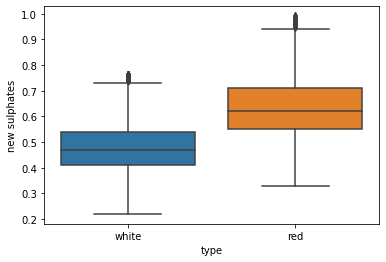

In [76]:
sns.boxplot( data=wine.loc[ : , : ] , x="type" , y="new sulphates" )

In [77]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,...,quality,new free sulfur dioxide,new fixed acidity,new volatile acidity,new citric acid,new residual sugar,new chlorides,new total sulfur dioxide,new pH,new sulphates
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,...,6.0,45.0,7.0,0.270,0.36,20.7,0.045,170.0,3.00,0.450000
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,...,6.0,14.0,6.3,0.300,0.34,1.6,0.049,132.0,3.30,0.490000
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,...,6.0,30.0,8.1,0.280,0.40,6.9,0.050,97.0,3.26,0.440000
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,...,6.0,47.0,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.400000
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,...,6.0,47.0,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,...,5.0,32.0,6.2,0.600,0.08,2.0,0.090,44.0,3.45,0.580000
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,...,6.0,39.0,5.9,0.550,0.10,2.2,0.062,51.0,3.52,0.531215
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,...,6.0,29.0,6.3,0.510,0.13,2.3,0.076,40.0,3.42,0.750000
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,...,5.0,32.0,5.9,0.645,0.12,2.0,0.075,44.0,3.57,0.710000


#### Se modifica el dataframe eliminando las columnas viejas y renombrando las nuevas para posteriormente crear un archivo csv que contendra todas las variables limpiadas

In [78]:
wine = wine.drop(columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar' ,'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates'])

In [79]:
wine.rename(columns={'new free sulfur dioxide': 'free sulfur dioxide',
                     'new fixed acidity': 'fixed acidity',
                     'new volatile acidity': 'volatile acidity',
                     'new citric acid': 'citric acid',
                     'new residual sugar': 'residual sugar',
                     'new chlorides': 'chlorides',
                     'new total sulfur dioxide': 'total sulfur dioxide',
                     'new pH': 'pH',
                     'new sulphates': 'sulphates'}, inplace=True)

In [80]:
wine = wine[['type','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
             'total sulfur dioxide','density','pH','sulphates','alcohol','quality']]

In [81]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0


In [82]:
wine.to_csv("modified_winequalityN.csv", index_label = True, index = False)